<a href="https://colab.research.google.com/github/roonboi/PHYS-417/blob/main/Lab1_ArunIyer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1 Report:
## Data Preparation Techniques for Machine Learning

### Name: Arun Iyer

In [ ]:
# Import necessary libraries

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from IPython.display import Image # For displaying images in colab jupyter cell

In [ ]:
Image('/content/lab1_exercise1.png', width = 1000)

FileNotFoundError: No such file or directory: '/content/lab1_exercise1.png'

FileNotFoundError: No such file or directory: '/content/lab1_exercise1.png'

<IPython.core.display.Image object>

In [ ]:
# Load the dataset (.csv) using pandas package

CMS_calori_dataset = pd.read_csv('hgcal.csv')

# .head directive on the panda dataframe displays the first n-rows

CMS_calori_dataset.head(n = 10)

,Unnamed: 0,x,y,z,eta,phi,energy,trackId
0,0,179.50383,-23.632137,-7.878280,-0.0435,-0.130900,0.200126,462412
1,1,-143.63881,110.217940,-72.706795,-0.3915,2.487094,2.734594,493395
2,2,179.50383,-23.632120,-146.429610,-0.7395,-0.130900,0.423910,1
3,3,-172.67310,54.443620,-238.065340,-1.0875,2.836160,0.713950,493640
4,4,-180.88046,7.897389,-238.065340,-1.0875,3.097959,0.000000,495225
5,5,-180.88045,-7.897438,-238.065340,-1.0875,-3.097959,0.034491,495225
6,6,-152.69838,-97.279590,-265.020540,-1.1745,-2.574361,0.580138,460126
7,7,-23.63213,179.503810,-325.172060,-1.3485,1.701696,0.411487,465028
8,8,-152.69835,97.279594,89.977780,0.4785,2.574361,0.183141,1383
9,9,-176.76110,39.187016,107.930240,0.5655,2.923426,0.337551,4421


In [ ]:
# Convert the panda dataframe into numpy 2D array

CMS_calori_dataset_np = CMS_calori_dataset.to_numpy()

# The converted numpy array has the dimension of 420 (rows) x 8 (columns)

print(CMS_calori_dataset_np.shape)

(420, 8)


In [ ]:
# Extract only x, y, z, eta, phi and energy columns from the dataset and stack them along column direction
# Name this new 2D array CMS_calori_dataset_np_sub.
# The array should have dimension 420 (rows) x 6 (columns)

# YOUR CODE HERE
# Extract only x, y, z, eta, phi and energy columns (columns 1-6) from the dataset
# Column 0 is "Unnamed: 0" which is an index and column 7 is "trackId" which we don't need
CMS_calori_dataset_np_sub = CMS_calori_dataset_np[:, 1:7]
print("Shape of CMS_calori_dataset_np_sub:", CMS_calori_dataset_np_sub.shape)

Shape of CMS_calori_dataset_np_sub: (420, 6)


In [ ]:
# Create the scaling function

def scale_data(arr):

    # YOUR CODE HERE
    """
    Performs standard scaling on a 2D NumPy array.

    Standard scaling formula: z = (x - μ)/σ
    where:
        x = original datapoint
        μ = mean of the data
        σ = standard deviation

    Parameters:
    -----------
    arr : numpy.ndarray
        2D input array where each column will be scaled independently

    Returns:
    --------
    numpy.ndarray
        A new 2D array containing scaled column data with same shape as input
    """

    # Create a copy of the input array to avoid modifying the original
    scaled_data = np.zeros_like(arr, dtype=float)

    # Get the number of columns
    num_cols = arr.shape[1]

    for col in range(num_cols):
        # Extract column
        column = arr[:, col]

        # Calculate mean and standard deviation
        mean = np.mean(column)
        std = np.std(column)

        # Standard scaling formula: z = (x - μ)/σ
        scaled_data[:, col] = (column - mean) / std

    return scaled_data

In [ ]:
# Test the function with CMS_calori_dataset_np_sub

CMS_calori_dataset_np_sub_scaled = scale_data(CMS_calori_dataset_np_sub)

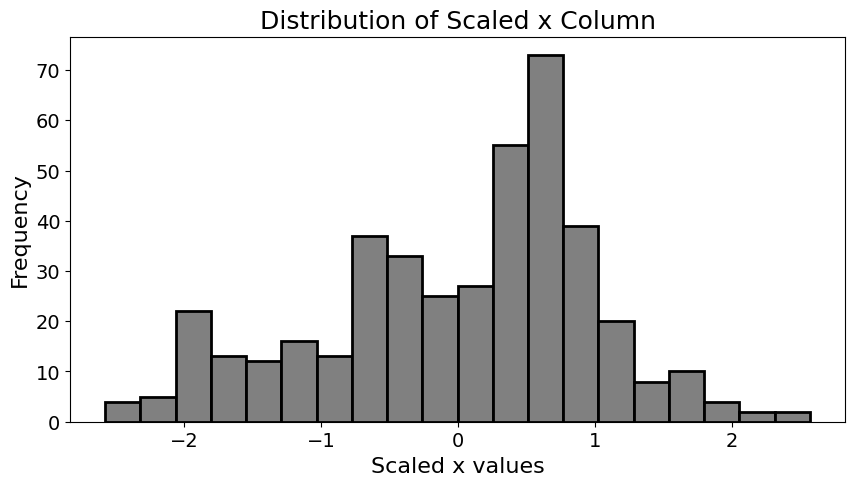

In [ ]:
# Confirm the data is scaled for 'x' column

plt.figure(figsize = (10, 5))

plt.hist(CMS_calori_dataset_np_sub_scaled[:, 0], bins = 20, facecolor = 'grey', edgecolor = 'black', linewidth = 2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add proper x-label and y-label

# YOUR CODE HERE
plt.xlabel('Scaled x values', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Distribution of Scaled x Column', fontsize=18)

plt.show()

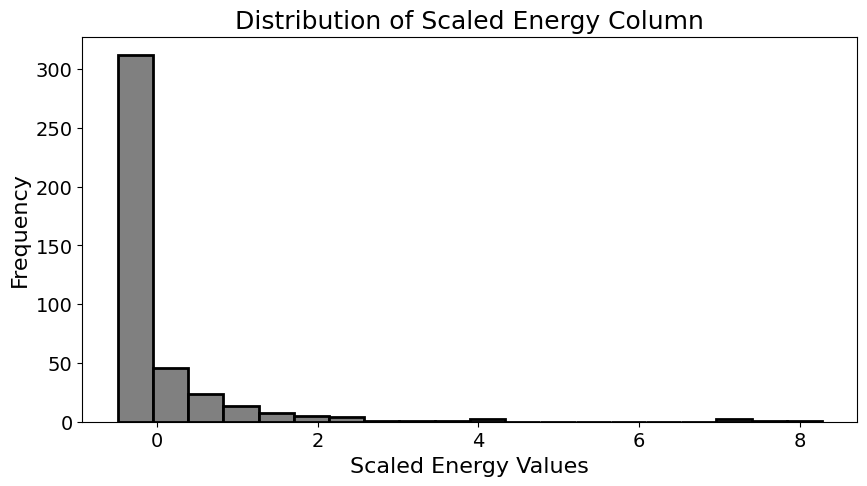

In [ ]:
# Confirm the data is scaled for 'energy' column

plt.figure(figsize = (10, 5))

plt.hist(CMS_calori_dataset_np_sub_scaled[:, 5], bins = 20, facecolor = 'grey', edgecolor = 'black', linewidth = 2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add proper x-label and y-label

# YOUR CODE HERE
plt.xlabel('Scaled Energy Values', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Distribution of Scaled Energy Column', fontsize=18)

plt.show()

### Expected histogram outputs - Feel free to style your plot differently

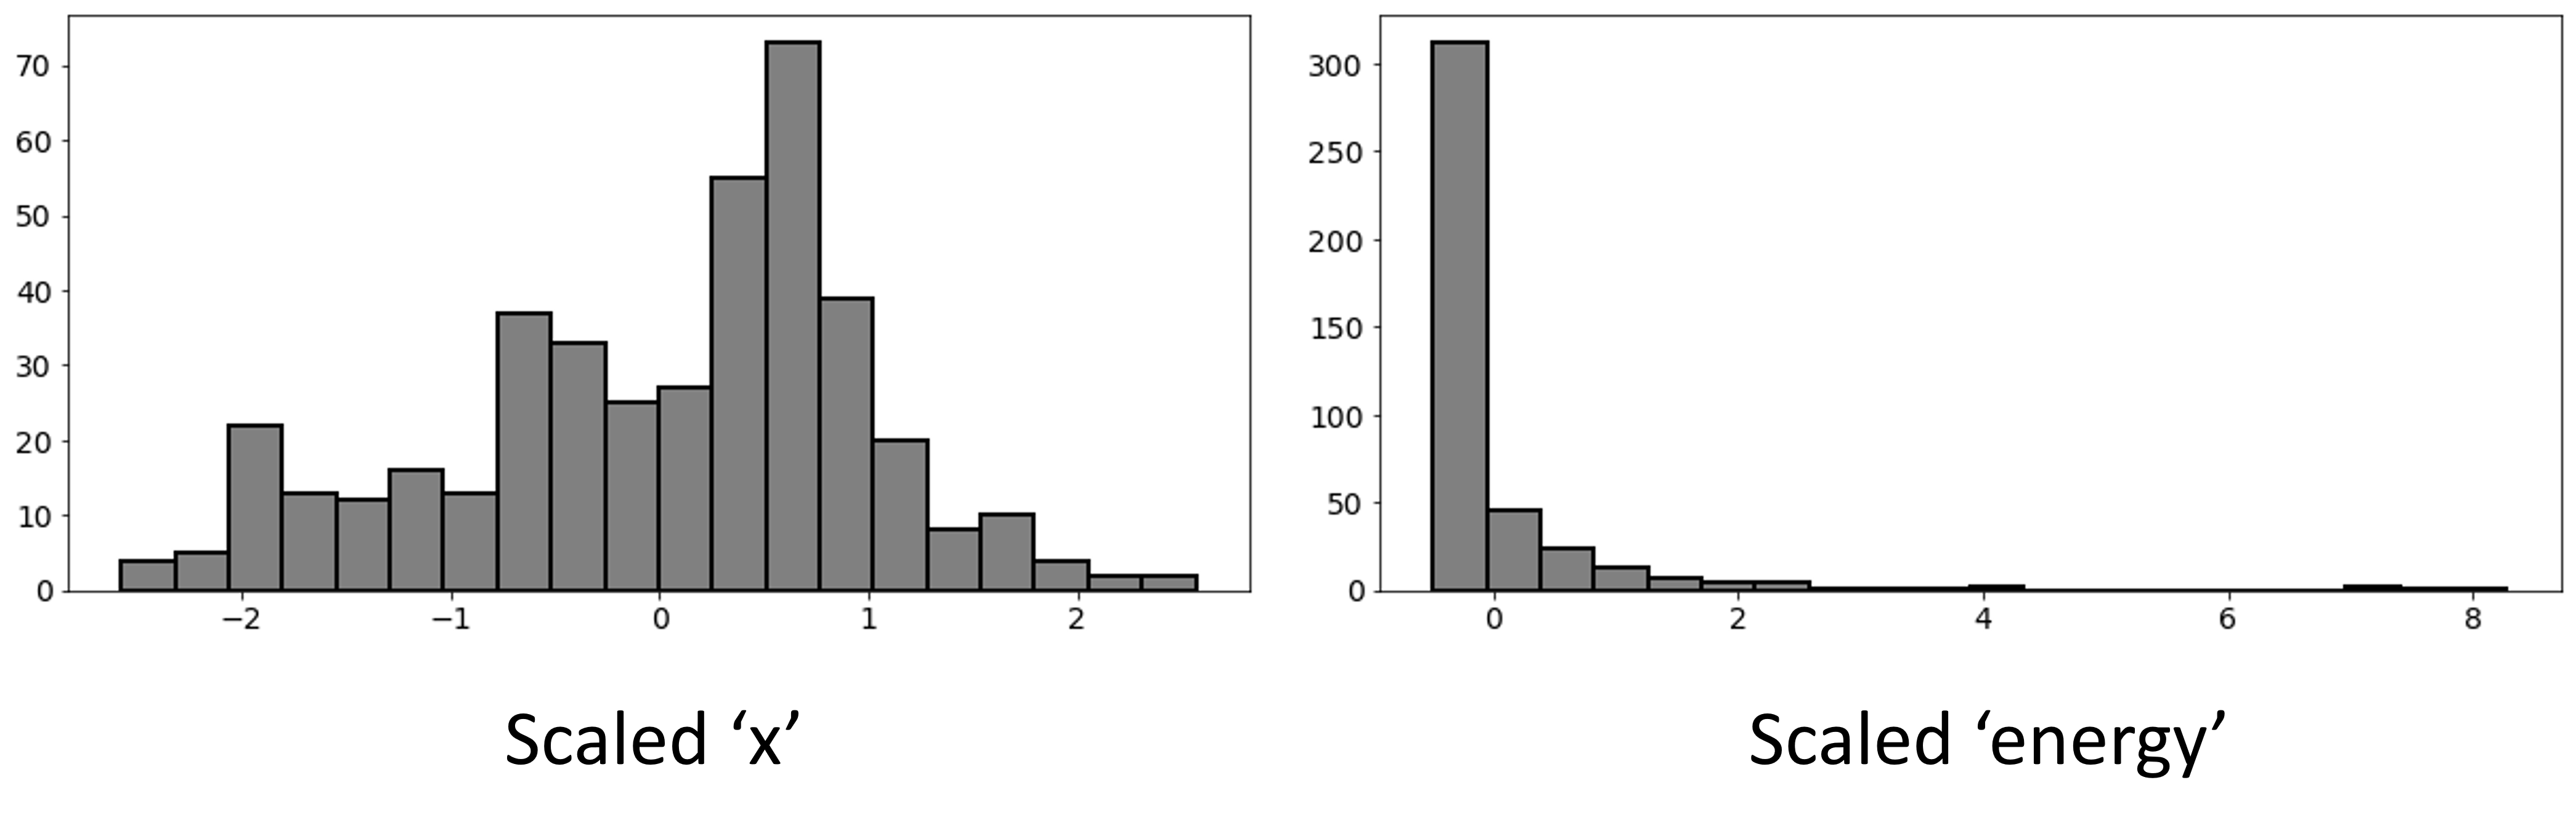

In [ ]:
Image('/content/lab1_e1_expected_outputs.png', width = 1000)

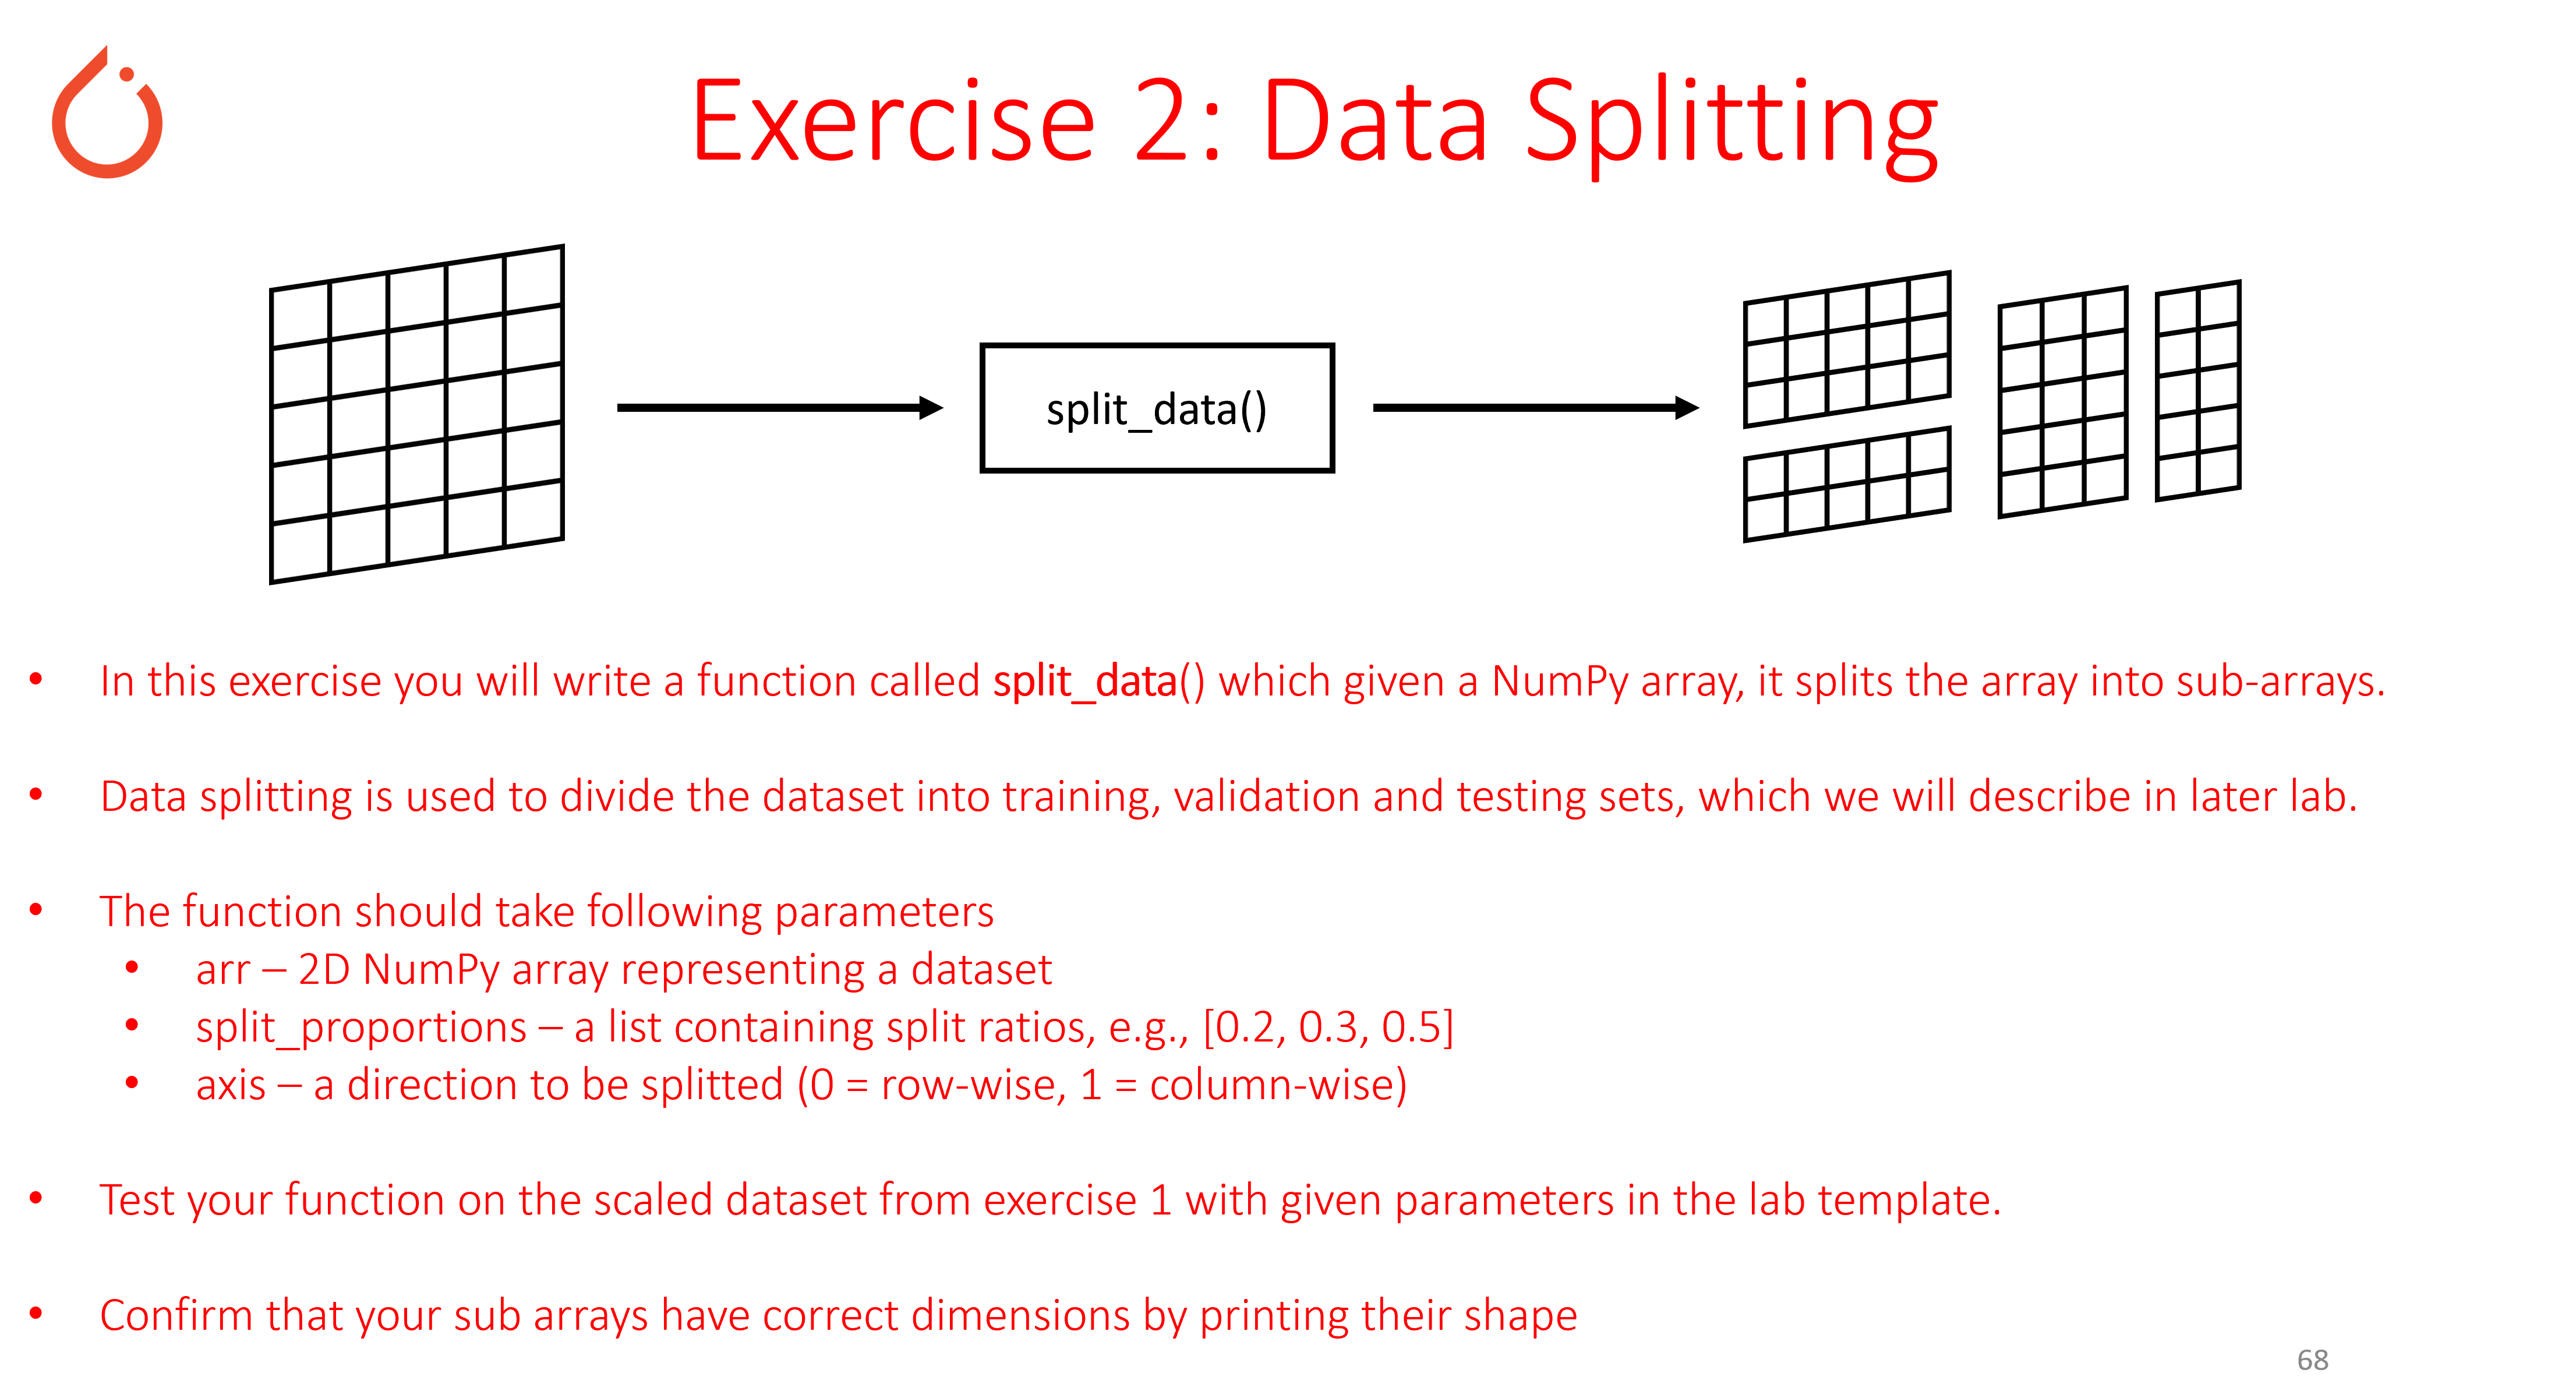

In [ ]:
Image('/content/lab1_exercise2.png', width = 1000)

In [ ]:
# Create the splitting function

def split_data(arr, split_proportions, axis):

    # YOUR CODE HERE

    """
    Splits a NumPy array into multiple subarrays based on specified proportions.

    Parameters:
    -----------
    arr : numpy.ndarray
        Input array to be split
    split_proportions : list of float
        List of proportions that must sum to 1.0
        Example: [0.6, 0.2, 0.2] for 60% training, 20% validation, 20% test
    axis : int
        The axis along which to split the array (0 for rows, 1 for columns)

    Returns:
    --------
    list of numpy.ndarray
        List of subarrays split according to specified proportions

    Raises:
    -------
    ValueError
        If split proportions don't sum to 1.0
    """

    # Check if split proportions sum to 1
    if abs(sum(split_proportions) - 1.0) > 1e-10:
        raise ValueError("Split proportions must sum to 1")

    # Get total size along the specified axis
    total_size = arr.shape[axis]

    # Calculate cumulative sizes for each split
    cumulative_props = [sum(split_proportions[:i+1]) for i in range(len(split_proportions))]

    # Calculate indices where to split the array
    split_indices = [int(prop * total_size) for prop in cumulative_props[:-1]]

    # Split the array along the specified axis
    split_data_list = np.split(arr, split_indices, axis=axis)

    # Returns a list of numpy sub-arrays according to split proportions
    return split_data_list

In [ ]:
# Test your split function against scaled CMS Calorimieter dataset from exercise 1

sub_data_list_1 = split_data(arr = CMS_calori_dataset_np_sub_scaled,
                                    split_proportions = [0.6, 0.2, 0.2], axis = 0)

In [ ]:
# Confirm that dataset has been split into correct shapes
# The correct dimensions should be (252, 6) (84, 6) (84, 6)

print(sub_data_list_1[0].shape, sub_data_list_1[1].shape, sub_data_list_1[2].shape)

(252, 6) (84, 6) (84, 6)


In [ ]:
# Test your split function against scaled CMS Calorimieter dataset from exercise 1

sub_data_list_2 = split_data(arr = CMS_calori_dataset_np_sub_scaled,
                                                split_proportions = [0.5, 0.5], axis = 1)

In [ ]:
# Confirm that dataset has been split into correct shapes
# The correct dimensions should be (420, 3) (420, 3)

print(sub_data_list_2[0].shape, sub_data_list_2[1].shape)

(420, 3) (420, 3)
